In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Fraud.csv')

In [3]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [5]:
df = df.drop(['step','isFlaggedFraud','nameOrig','nameDest'], axis=1)

In [6]:
df.dropna()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0
...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1


In [7]:
unique_values = df['type'].unique()
print(unique_values)

['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']


In [8]:
types_to_count = ['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN']

# Filter the DataFrame to keep only the specified types and count their occurrences
type_counts = df['type'].value_counts()

# Create a new DataFrame with the counts of the specified types
result_df = pd.DataFrame({'type': types_to_count, 'count': [type_counts.get(t, 0) for t in types_to_count]})

print(result_df)

       type    count
0   PAYMENT  2151495
1  TRANSFER   532909
2  CASH_OUT  2237500
3     DEBIT    41432
4   CASH_IN  1399284


In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Fit and transform the 'type' column
df['type_en'] = label_encoder.fit_transform(df['type'])
df

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_en
0,PAYMENT,9839.64,170136.00,160296.36,0.00,0.00,0,3
1,PAYMENT,1864.28,21249.00,19384.72,0.00,0.00,0,3
2,TRANSFER,181.00,181.00,0.00,0.00,0.00,1,4
3,CASH_OUT,181.00,181.00,0.00,21182.00,0.00,1,1
4,PAYMENT,11668.14,41554.00,29885.86,0.00,0.00,0,3
...,...,...,...,...,...,...,...,...
6362615,CASH_OUT,339682.13,339682.13,0.00,0.00,339682.13,1,1
6362616,TRANSFER,6311409.28,6311409.28,0.00,0.00,0.00,1,4
6362617,CASH_OUT,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1
6362618,TRANSFER,850002.52,850002.52,0.00,0.00,0.00,1,4


### Encoding 'Type' feature

In [10]:
# Access the mapping of categorical values to encoded numbers
mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))

# Print the mapping of values to encoded numbers
print(mapping)

{'CASH_IN': 0, 'CASH_OUT': 1, 'DEBIT': 2, 'PAYMENT': 3, 'TRANSFER': 4}


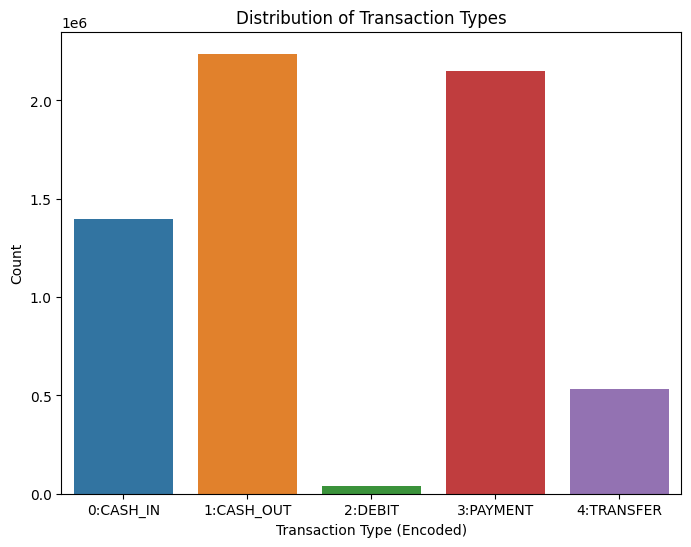

In [11]:
type_mapping = {0: '0:CASH_IN', 1: '1:CASH_OUT', 2: '2:DEBIT', 3: '3:PAYMENT', 4: '4:TRANSFER'}

# Create the countplot
plt.figure(figsize=(8, 6))
sns.countplot(x='type_en', data=df)

# Set the x-axis labels based on the mapping
plt.xticks(ticks=plt.xticks()[0], labels=[type_mapping[i] for i in range(len(type_mapping))])

plt.title('Distribution of Transaction Types')
plt.xlabel('Transaction Type (Encoded)')
plt.ylabel('Count')

plt.show()







### Transaction type involved in Fraud

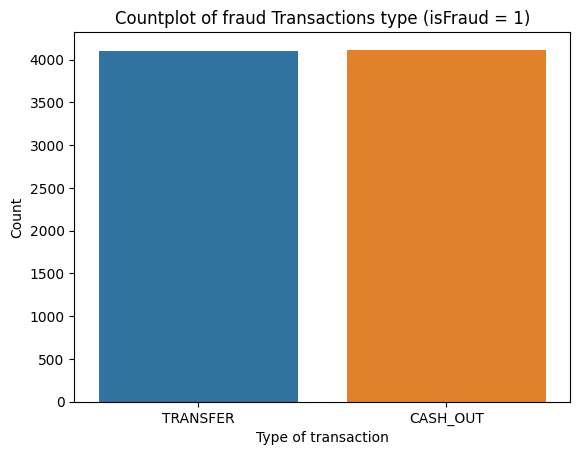

In [12]:
fraud_data = df[df['isFraud'] == 1]

# Create the countplot for the filtered data
sns.countplot(data=fraud_data, x='type')

# Set the labels and title
plt.xlabel('Type of transaction')
plt.ylabel('Count')
plt.title('Countplot of fraud Transactions type (isFraud = 1)')

# Show the plot
plt.show()

In [13]:
df = df.drop(['type'], axis=1)

In [14]:
df

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_en
0,9839.64,170136.00,160296.36,0.00,0.00,0,3
1,1864.28,21249.00,19384.72,0.00,0.00,0,3
2,181.00,181.00,0.00,0.00,0.00,1,4
3,181.00,181.00,0.00,21182.00,0.00,1,1
4,11668.14,41554.00,29885.86,0.00,0.00,0,3
...,...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1,1
6362616,6311409.28,6311409.28,0.00,0.00,0.00,1,4
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1,1
6362618,850002.52,850002.52,0.00,0.00,0.00,1,4


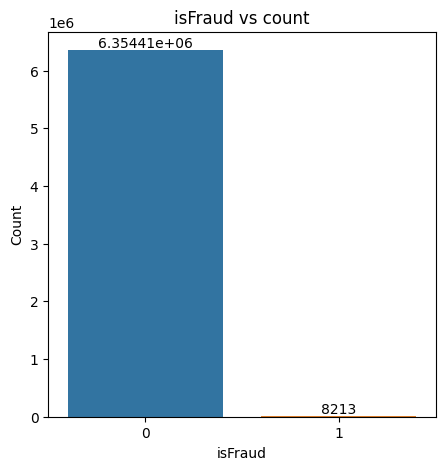

In [15]:
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
# Countplot of 'isFraud'
plt.figure(figsize=(5,5))
plt.title('isFraud vs count')
ax = sns.countplot(data=df,x='isFraud')
plt.xlabel('isFraud')
plt.ylabel('Count')
for i in ax.containers:
    ax.bar_label(i,)

plt.show()

In [16]:
labels=["Genuine","Fraud"]

fraud_or_not = df["isFraud"].value_counts().tolist()
values = [fraud_or_not[0], fraud_or_not[1]]

fig = px.pie(values=df['isFraud'].value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["orange","black"]
             ,title="Fraud vs Genuine transactions")
fig.show()

In [17]:
df['isFraud'].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

<Axes: >

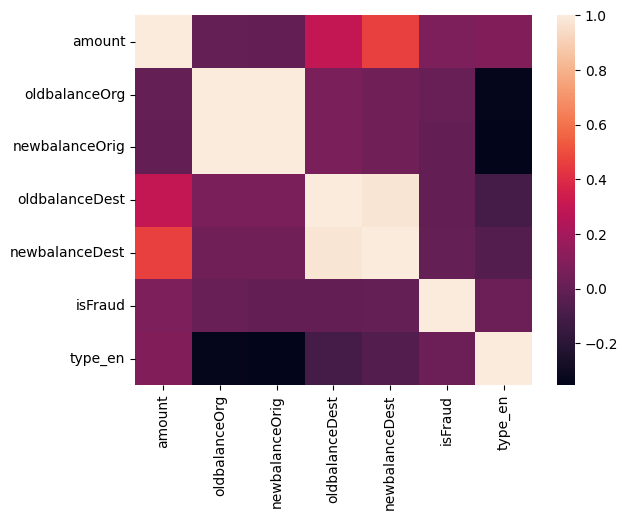

In [18]:
sns.heatmap(df.corr())

In [19]:
df.describe()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_en
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,1.714150e+00
std,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.350117e+00
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
50%,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,1.000000e+00
75%,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,3.000000e+00
max,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,4.000000e+00


# Splitting independent and target variable

In [20]:
#Create independent and Dependent Features
columns = df.columns.tolist()
# Filter the columns to remove data we do not want 
columns = [c for c in columns if c not in ["isFraud"]]
# Store the variable we are predicting 
target = "isFraud"
# Define a random state 
state = np.random.RandomState(42)
X = df[columns]
Y = df[target]

# Undersampling to handle imbalanced data

In [21]:
X

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,type_en
0,9839.64,170136.00,160296.36,0.00,0.00,3
1,1864.28,21249.00,19384.72,0.00,0.00,3
2,181.00,181.00,0.00,0.00,0.00,4
3,181.00,181.00,0.00,21182.00,0.00,1
4,11668.14,41554.00,29885.86,0.00,0.00,3
...,...,...,...,...,...,...
6362615,339682.13,339682.13,0.00,0.00,339682.13,1
6362616,6311409.28,6311409.28,0.00,0.00,0.00,4
6362617,6311409.28,6311409.28,0.00,68488.84,6379898.11,1
6362618,850002.52,850002.52,0.00,0.00,0.00,4


In [22]:
Y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [23]:
fraud = df[df['isFraud']==1]
gen = df[df['isFraud']==0]
print(fraud.shape,gen.shape)

(8213, 7) (6354407, 7)


In [24]:
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(sampling_strategy='majority', random_state=42)

# Resample the data
X_res, y_res = rus.fit_resample(X, Y)
X_res.shape,y_res.shape

((16426, 6), (16426,))

In [25]:
from collections import Counter
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 6354407, 1: 8213})
Resampled dataset shape Counter({0: 8213, 1: 8213})


### After Undersampling dataset

In [26]:
labels=["Genuine","Fraud"]

fraud_or_not1 = y_res.value_counts().tolist()
values1 = [fraud_or_not1[0], fraud_or_not1[1]]

fig1 = px.pie(values=y_res.value_counts(), names=labels , width=700, height=400, color_discrete_sequence=["orange","black"]
             ,title="Fraud vs Genuine transactions")
fig1.show()

In [27]:
y_res.info()

<class 'pandas.core.series.Series'>
Index: 16426 entries, 1777056 to 6362619
Series name: isFraud
Non-Null Count  Dtype
--------------  -----
16426 non-null  int64
dtypes: int64(1)
memory usage: 256.7 KB


In [28]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)
X_scaled.shape

(16426, 6)

# Splitting train and test data

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_res, test_size=0.2, random_state=42)

# Classification

## Logistic regression

Classification Report:


              precision    recall  f1-score   support

           0       0.81      0.99      0.89      1649
           1       0.98      0.76      0.86      1637

    accuracy                           0.87      3286
   macro avg       0.89      0.87      0.87      3286
weighted avg       0.89      0.87      0.87      3286

Logistic Regression:
Accuracy: 0.8743152769324407
Confusion Matrix:


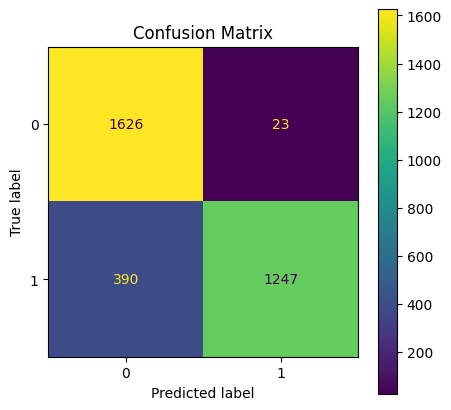

AUC-ROC Score: 0.873905734320758


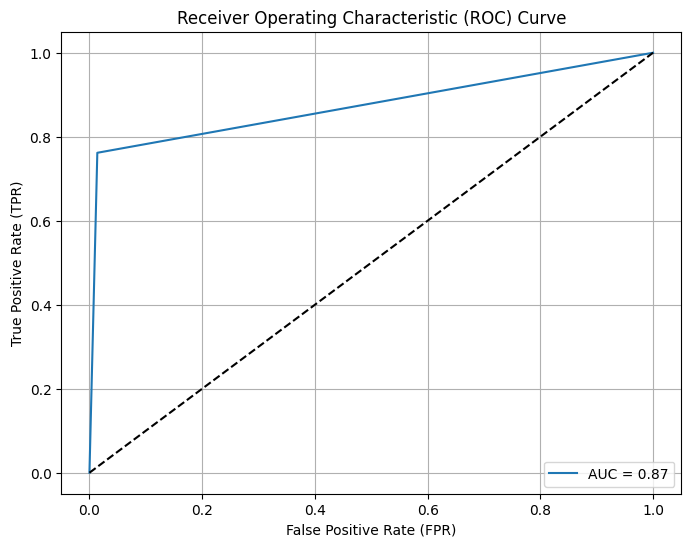

Precision : 0.9818897637795275
Recall : 0.7617593158216249
F1 Score : 0.8579291365669075


In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.metrics import ConfusionMatrixDisplay

# Logistic Regression
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(X_train, y_train)
y_pred_logreg = logreg_model.predict(X_test)


print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))


# Evaluate the models
print("Logistic Regression:")
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))
print("Confusion Matrix:")
classes = ["0","1"]
cm = confusion_matrix(y_test,y_pred_logreg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(5,5))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_logreg)
auc_roc_score = roc_auc_score(y_test, y_pred_logreg)
print("AUC-ROC Score:", auc_roc_score)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



## Random Forest


Random Forest:
Accuracy: 0.9951308581862447
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1649
           1       0.99      1.00      1.00      1637

    accuracy                           1.00      3286
   macro avg       1.00      1.00      1.00      3286
weighted avg       1.00      1.00      1.00      3286

Accuracy: 0.9951308581862447
Confusion Matrix:


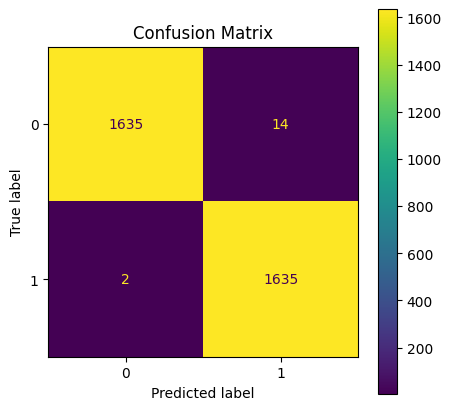

AUC-ROC Score: 0.9951441294829654


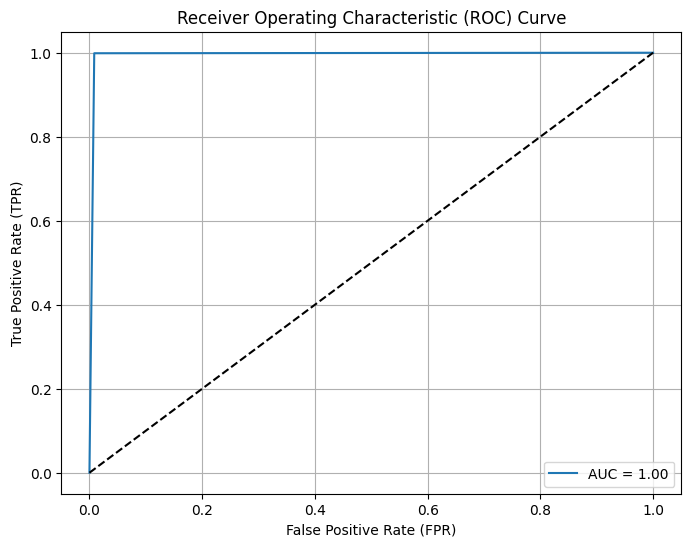

In [31]:

# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))



#Evaluate the models
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:")
classes = ["0","1"]
cm = confusion_matrix(y_test,y_pred_rf)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(5,5))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_rf)
auc_roc_score = roc_auc_score(y_test, y_pred_rf)
print("AUC-ROC Score:", auc_roc_score)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




## XGBoost


XGBoost:
Accuracy: 0.9951308581862447
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1649
           1       0.99      1.00      1.00      1637

    accuracy                           1.00      3286
   macro avg       1.00      1.00      1.00      3286
weighted avg       1.00      1.00      1.00      3286

Accuracy: 0.9951308581862447
Confusion Matrix:


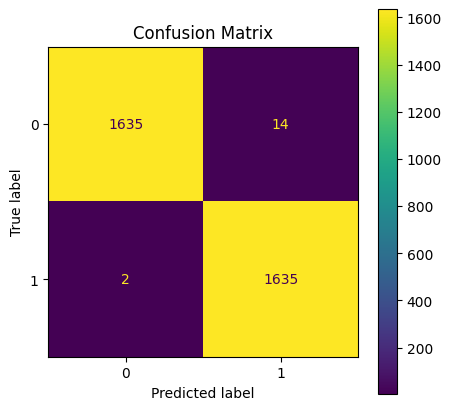

AUC-ROC Score: 0.9951441294829654


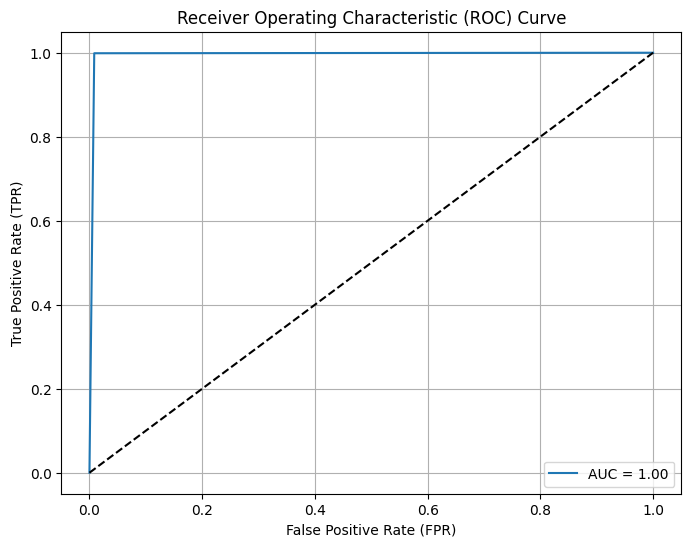

In [32]:
# XGBoost
xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)


print("\nXGBoost:")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Classification Report:")
print(classification_report(y_test, y_pred_xgb))

#Evaluate the models
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:")
classes = ["0","1"]
cm = confusion_matrix(y_test,y_pred_xgb)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(5,5))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)
auc_roc_score = roc_auc_score(y_test, y_pred_xgb)
print("AUC-ROC Score:", auc_roc_score)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


## Decision Tree


Decision Tree:
Accuracy: 0.9933049300060864
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1649
           1       0.99      1.00      0.99      1637

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

Accuracy: 0.9933049300060864
Confusion Matrix:


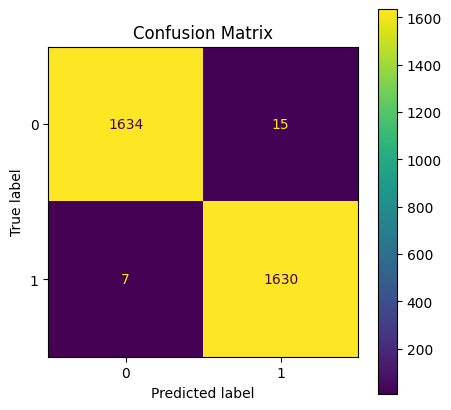

AUC-ROC Score: 0.9933137315408942


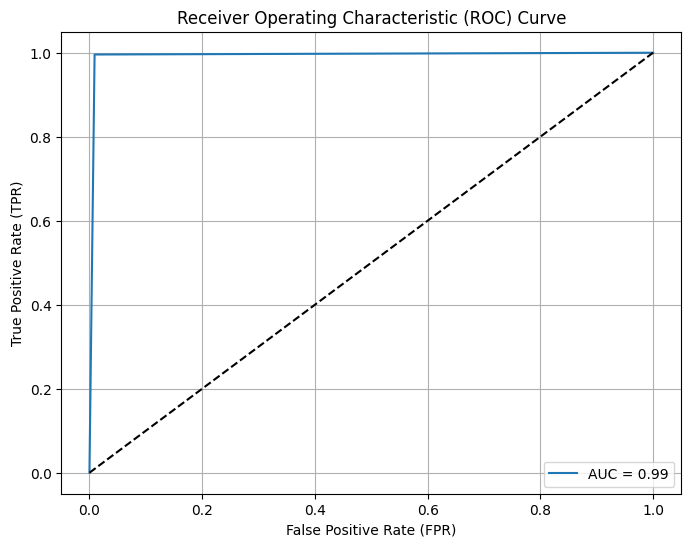

In [33]:
# Decision Tree
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\nDecision Tree:")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Classification Report:")
print(classification_report(y_test, y_pred_dt))


#Evaluate the models
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:")
classes = ["0","1"]
cm = confusion_matrix(y_test,y_pred_dt)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classes)
fig, ax = plt.subplots(figsize=(5,5))
plt.title("Confusion Matrix")
disp = disp.plot(ax=ax)
plt.show()

fpr, tpr, thresholds = roc_curve(y_test, y_pred_dt)
auc_roc_score = roc_auc_score(y_test, y_pred_dt)
print("AUC-ROC Score:", auc_roc_score)
# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc_score:.2f}')
plt.plot([0, 1], [0, 1], 'k--')  # Random guessing line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()
